Importing libraries

In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline
from plotly import tools
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Data Set Loading and Reading

In [2]:
myData = pd.read_csv(r'AI-Data.csv')
# Any results you write to the current directory are saved as output.
myData.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# Describing the Data Set

In [3]:
myData.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


# Data Set Shape(Rows and Column)

In [4]:
print(myData.shape)

(480, 17)


# Data Set Columns

In [5]:
myData.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

# Checking Missing Values in the Data Set

In [6]:
myData.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# Gender Count, Percentage and Chart

In [7]:
myData['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

Normalized percentage
M    0.635417
F    0.364583
Name: gender, dtype: float64


<Axes: >

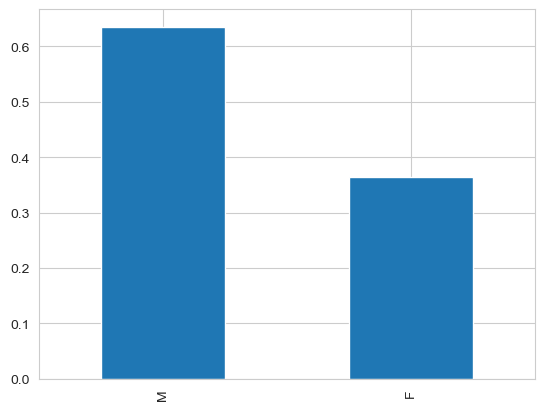

In [8]:
print(f'Normalized percentage\n{myData.gender.value_counts(normalize=True)}')
# myData.gender.value_counts(normalize=False).plot(kind='bar')
myData.gender.value_counts(normalize=True).plot(kind='bar')

# NationalITy Count, Percentage and Chart

In [9]:
myData['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

Normalized Percentage
KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
USA            0.012500
Iran           0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


<Axes: >

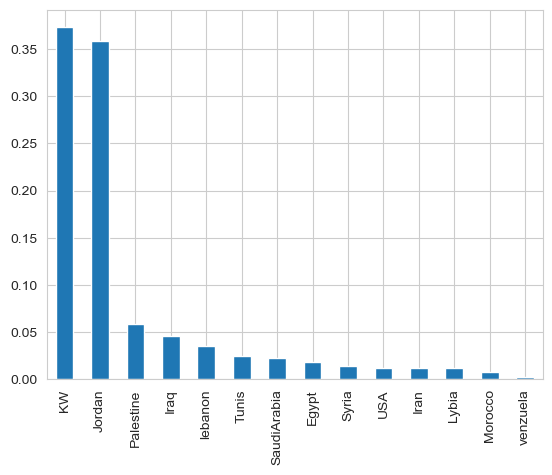

In [10]:
print(f'Normalized Percentage\n{myData.NationalITy.value_counts(normalize=True)}')
myData.NationalITy.value_counts(normalize=True).plot(kind='bar')

# PlaceofBirth Count, Percentage and Chart

In [11]:
myData['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

Normalized Percentage
KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Iran           0.012500
Syria          0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


<Axes: >

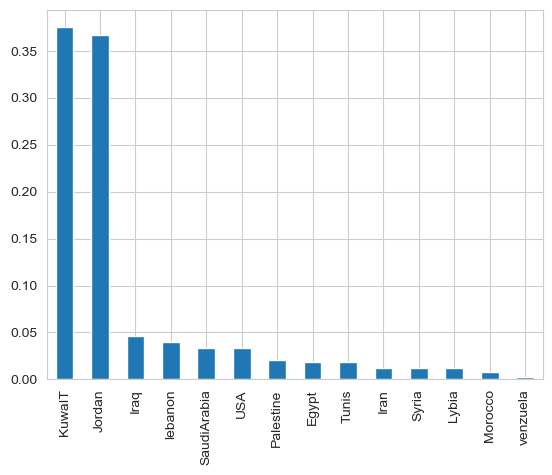

In [12]:
print(f'Normalized Percentage\n{myData.PlaceofBirth.value_counts(normalize=True)}')
myData.PlaceofBirth.value_counts(normalize=True).plot(kind='bar')

# StageID Count, Percentage and Plot

In [13]:
myData['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

Normalized Percentage
MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


<Axes: >

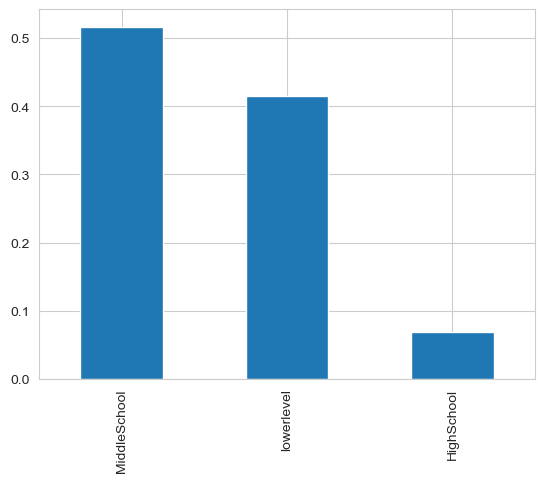

In [14]:
print(f'Normalized Percentage\n{myData.StageID.value_counts(normalize=True)}')
myData.StageID.value_counts(normalize=True).plot(kind='bar')

# GradeID Count, Percentage and Plot

In [15]:
myData['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

Normalized Percentage
G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


<Axes: >

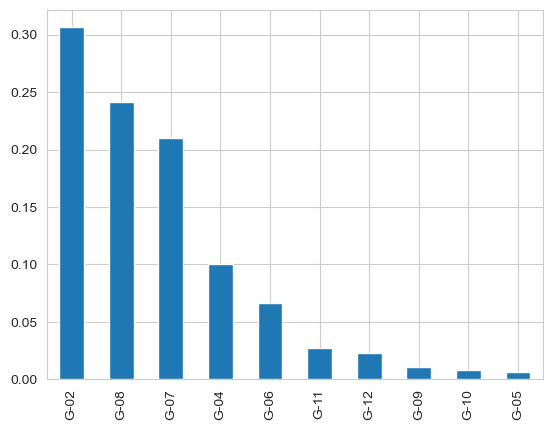

In [16]:
print(f'Normalized Percentage\n{myData.GradeID.value_counts(normalize=True)}')
myData.GradeID.value_counts(normalize=True).plot(kind='bar')

# Topic Count, Percentage and Plot

In [17]:
myData['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

Normalized Percentage
IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


<Axes: >

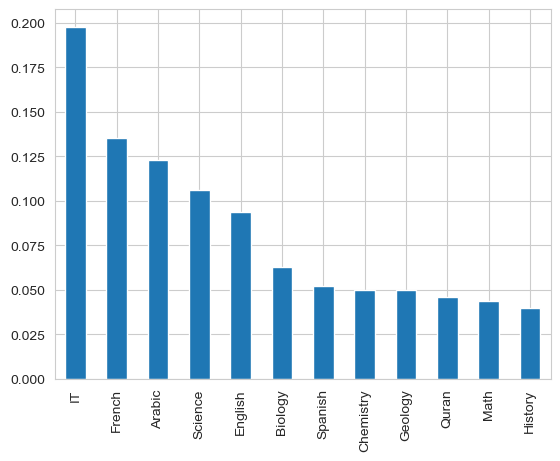

In [18]:
print(f'Normalized Percentage\n{myData.Topic.value_counts(normalize=True)}')
myData.Topic.value_counts(normalize=True).plot(kind='bar')

# Semester Counts Parcentage and Plot

In [19]:
myData['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

Normalized Parcentage
F    0.510417
S    0.489583
Name: Semester, dtype: float64


<Axes: >

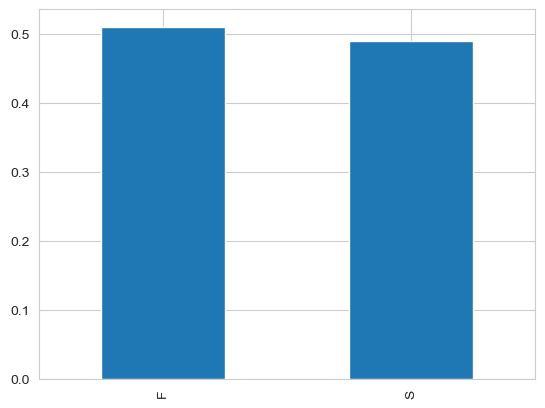

In [20]:
print(f'Normalized Parcentage\n{myData.Semester.value_counts(normalize=True)}')
myData.Semester.value_counts(normalize=True).plot(kind='bar')

# Relation Count, Parcentage and Plot

In [21]:
myData['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

Normalized Parcentage
Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


<Axes: >

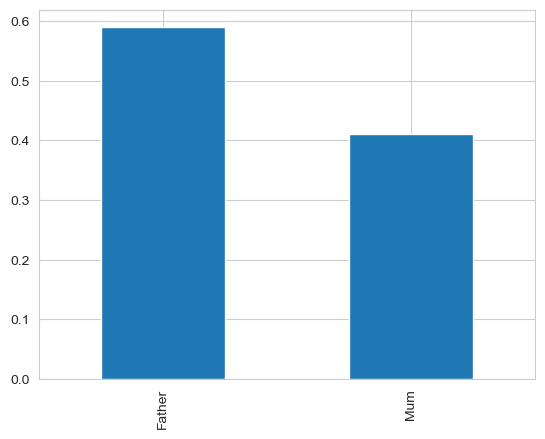

In [22]:
print(f'Normalized Parcentage\n{myData.Relation.value_counts(normalize=True)}')
myData.Relation.value_counts(normalize=True).plot(kind='bar')

# Raisedhands Count, Parcentage and Plot

In [23]:
myData['raisedhands'].value_counts()

10    31
70    31
80    28
72    17
50    17
      ..
61     1
83     1
52     1
67     1
97     1
Name: raisedhands, Length: 82, dtype: int64

In [24]:
# print('Parcentage',myData.raisedhands.value_counts(normalize=True))
# myData.raisedhands.value_counts(normalize=True).plot(kind='pie')
color_brewer = ['#41B5A3','#FFAF87','#FF8E72','#ED6A5E','#377771','#E89005','#C6000D','#000000','#05668D','#028090','#9FD35C',
                '#02C39A','#F0F3BD','#41B5A3','#FF6F59','#254441','#B2B09B','#EF3054','#9D9CE8','#0F4777','#5F67DD','#235077','#CCE4F9','#1748D1',
                '#8BB3D6','#467196','#F2C4A2','#F2B1A4','#C42746','#330C25']
fig = {
  "data": [
    {
      "values": myData["raisedhands"].value_counts().values,
      "labels": myData["raisedhands"].value_counts().index,
      "domain": {"x": [0, .95]},
      "name": "Raisedhands Parcentage",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie",
      "marker": {"colors": [i for i in reversed(color_brewer)]},
      "textfont": {"color": "#FFFFFF"}
    }],
  "layout": {
        "title":"Raisedhands Parcentage",
        "annotations": [
            {
                "font": {
                    "size": 50
                },
                "showarrow": False,
                "text": "Raisedhands Parcentage",
                "x": 0.47,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')

# ParentschoolSatisfaction Count, Parcentage and Plot

In [25]:
myData['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

Normalized Parcentage
Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


<Axes: >

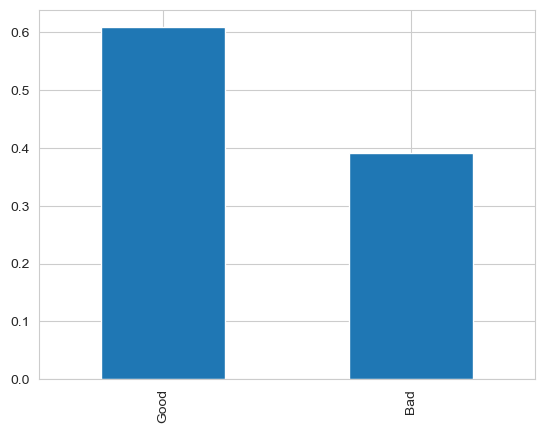

In [26]:
print(f'Normalized Parcentage\n{myData.ParentschoolSatisfaction.value_counts(normalize=True)}')
myData.ParentschoolSatisfaction.value_counts(normalize=True).plot(kind='bar')

# ParentAnsweringSurvey Count, Parcentage and Plot

In [27]:
myData['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

Normalized Parcentage
Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


<Axes: >

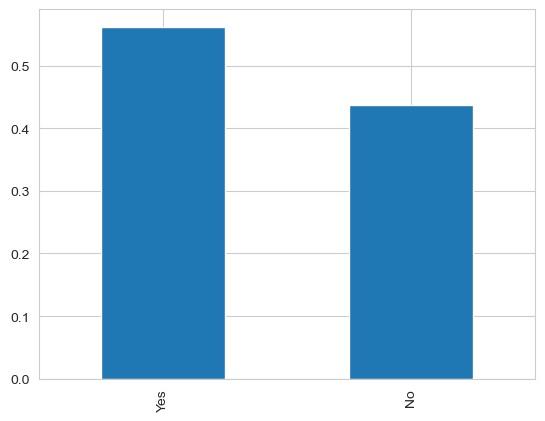

In [28]:
print(f'Normalized Parcentage\n{myData.ParentAnsweringSurvey.value_counts(normalize=True)}')
myData.ParentAnsweringSurvey.value_counts(normalize=True).plot(kind='bar')

# StudentAbsenceDays Count Percentage and Plot

In [29]:
myData['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

Normalized Parcentage
Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


<Axes: >

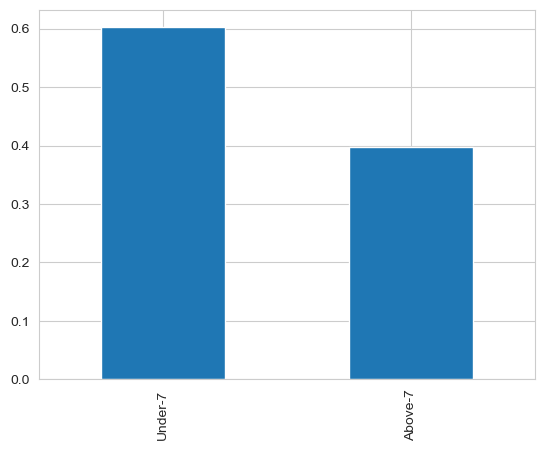

In [30]:
print(f'Normalized Parcentage\n{myData.StudentAbsenceDays.value_counts(normalize=True)}')
myData.StudentAbsenceDays.value_counts(normalize=True).plot(kind='bar')

# Class Value Count, Parcentage and Plot

In [31]:
myData['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

Normalized Parcentage
M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


<Axes: >

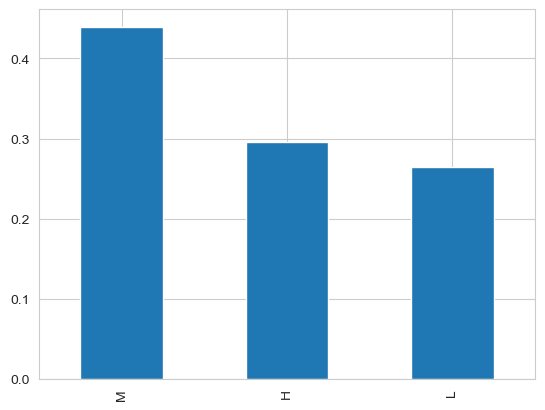

In [32]:
print(f'Normalized Parcentage\n{myData.Class.value_counts(normalize=True)}')
myData.Class.value_counts(normalize=True).plot(kind='bar')

#Checking the Class with respect to some features

<Axes: xlabel='Semester', ylabel='count'>

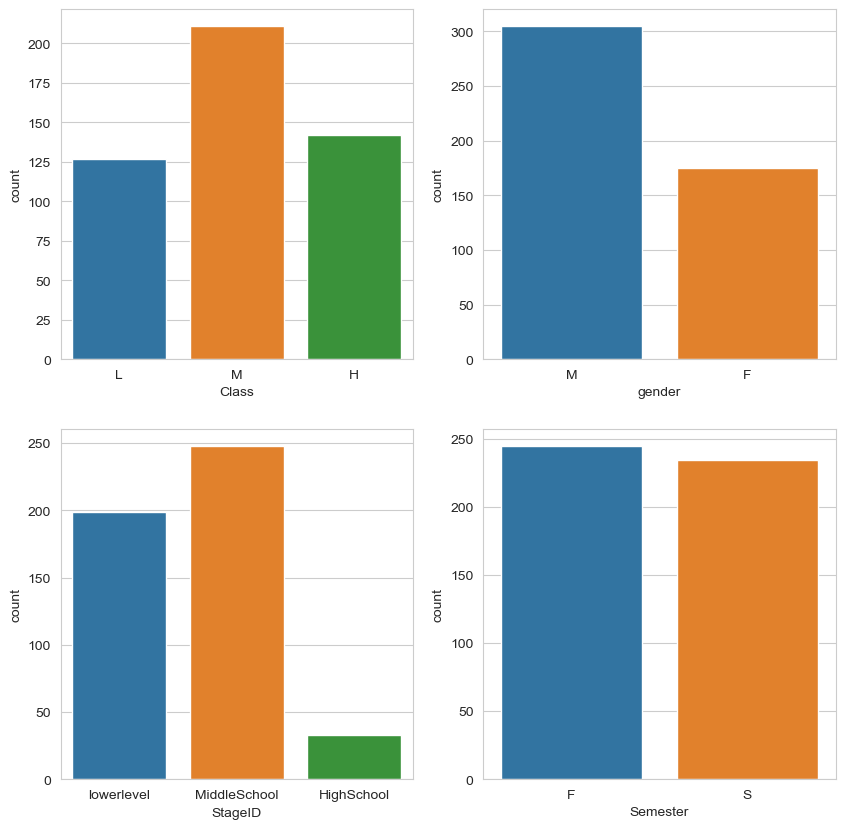

In [33]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sb.countplot(x='Class', data=myData, ax=axarr[0,0], order=['L','M','H'])
sb.countplot(x='gender', data=myData, ax=axarr[0,1], order=['M','F'])
sb.countplot(x='StageID', data=myData, ax=axarr[1,0])
sb.countplot(x='Semester', data=myData, ax=axarr[1,1])

<Axes: xlabel='NationalITy', ylabel='count'>

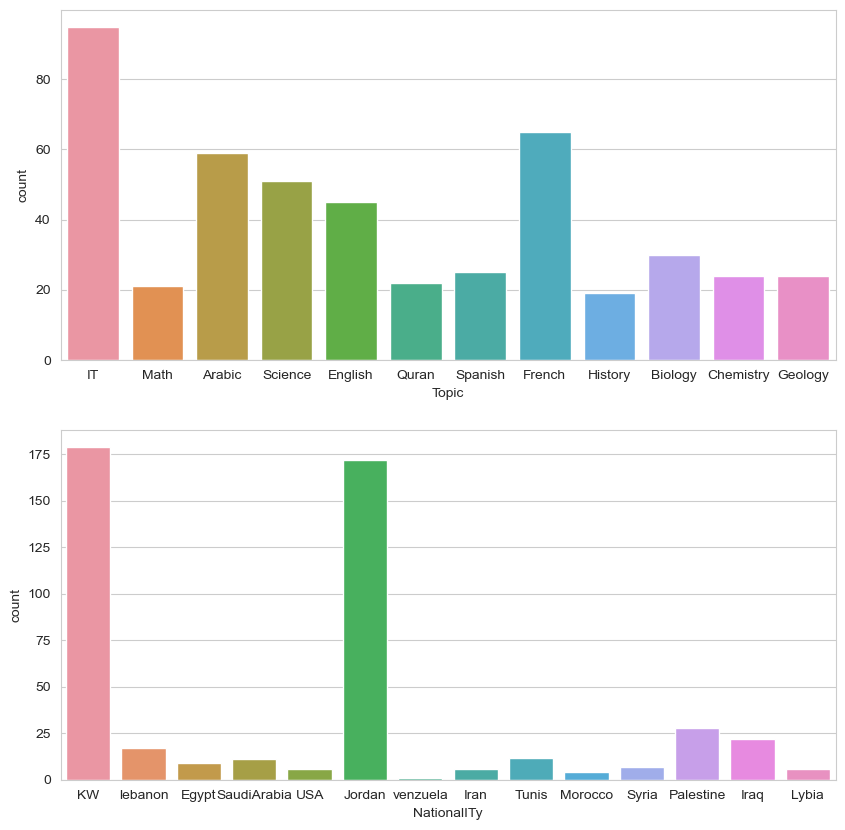

In [34]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sb.countplot(x='Topic', data=myData, ax=axis1)
sb.countplot(x='NationalITy', data=myData, ax=axis2)

<Axes: xlabel='gender', ylabel='count'>

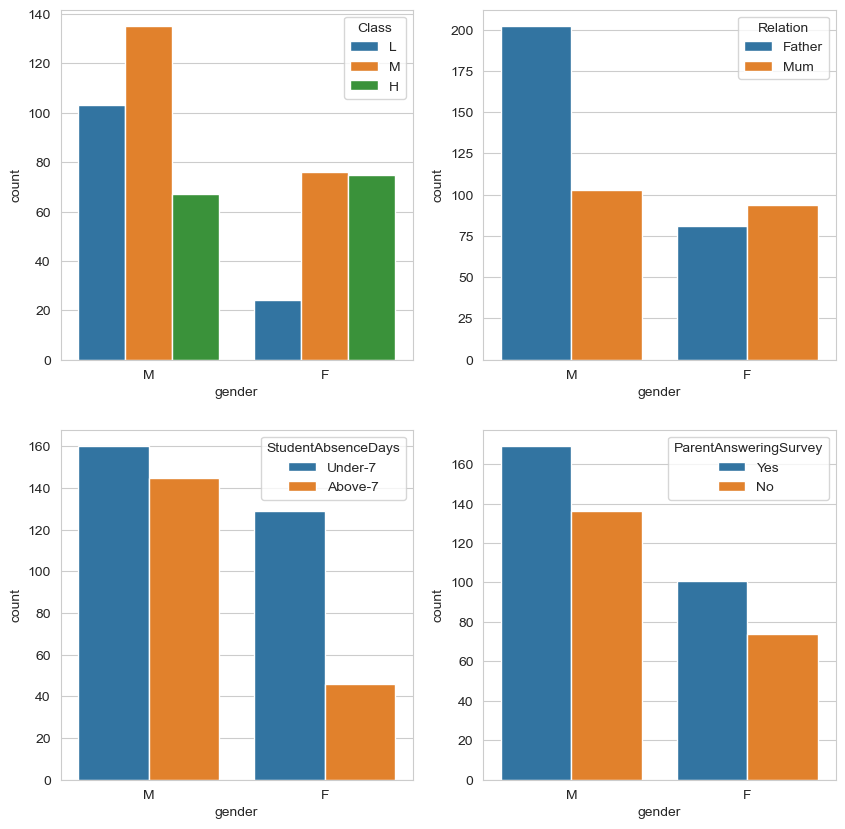

In [35]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sb.countplot(x='gender', hue='Class', data=myData, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sb.countplot(x='gender', hue='Relation', data=myData, ax=axarr[0,1], order=['M','F'])
sb.countplot(x='gender', hue='StudentAbsenceDays', data=myData, ax=axarr[1,0], order=['M','F'])
sb.countplot(x='gender', hue='ParentAnsweringSurvey', data=myData, ax=axarr[1,1], order=['M','F'])

<Axes: xlabel='NationalITy', ylabel='count'>

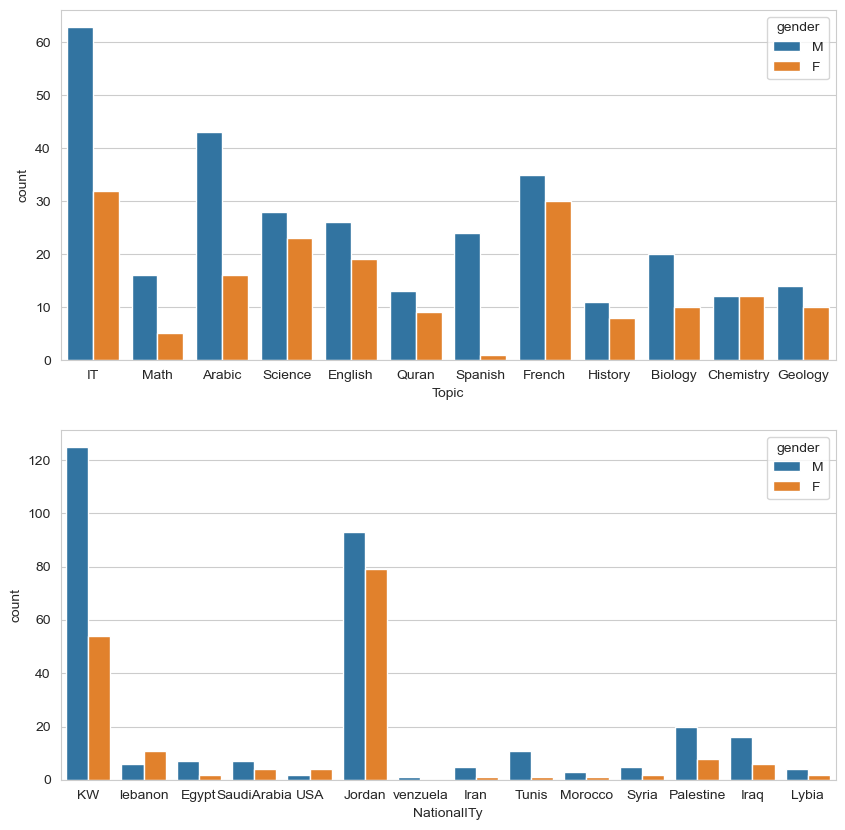

In [36]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sb.countplot(x='Topic', hue='gender', data=myData, ax=axis1)
sb.countplot(x='NationalITy', hue='gender', data=myData, ax=axis2)

<Axes: xlabel='NationalITy', ylabel='count'>

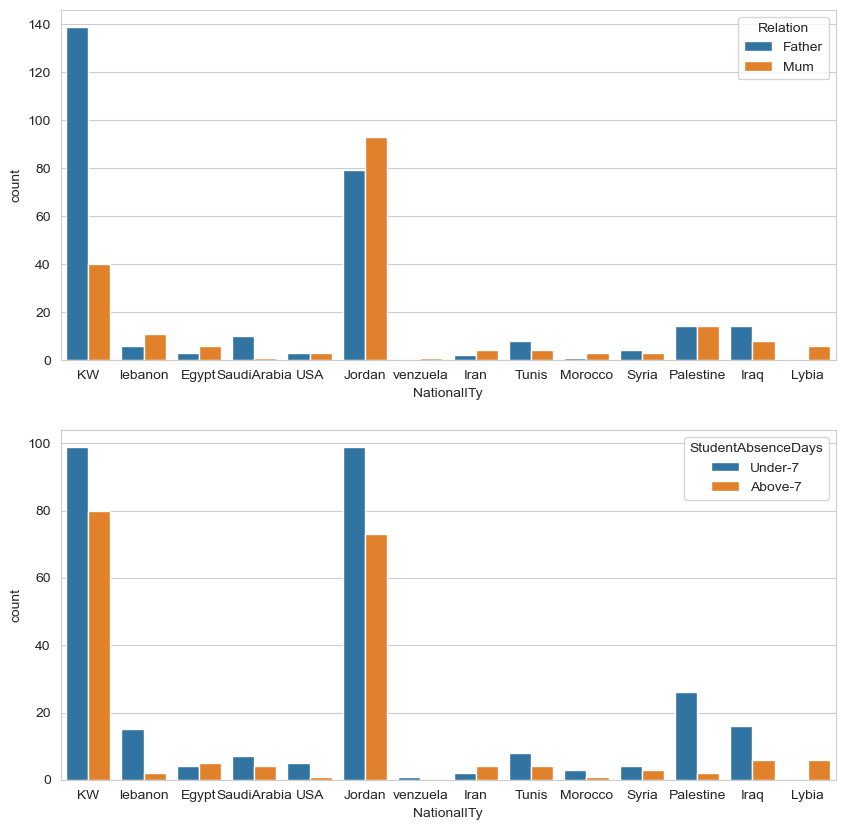

In [37]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sb.countplot(x='NationalITy', hue='Relation', data=myData, ax=axis1)
sb.countplot(x='NationalITy', hue='StudentAbsenceDays', data=myData, ax=axis2)


# visualization of categorical features with numerical features. 


<Axes: xlabel='Class', ylabel='Discussion'>

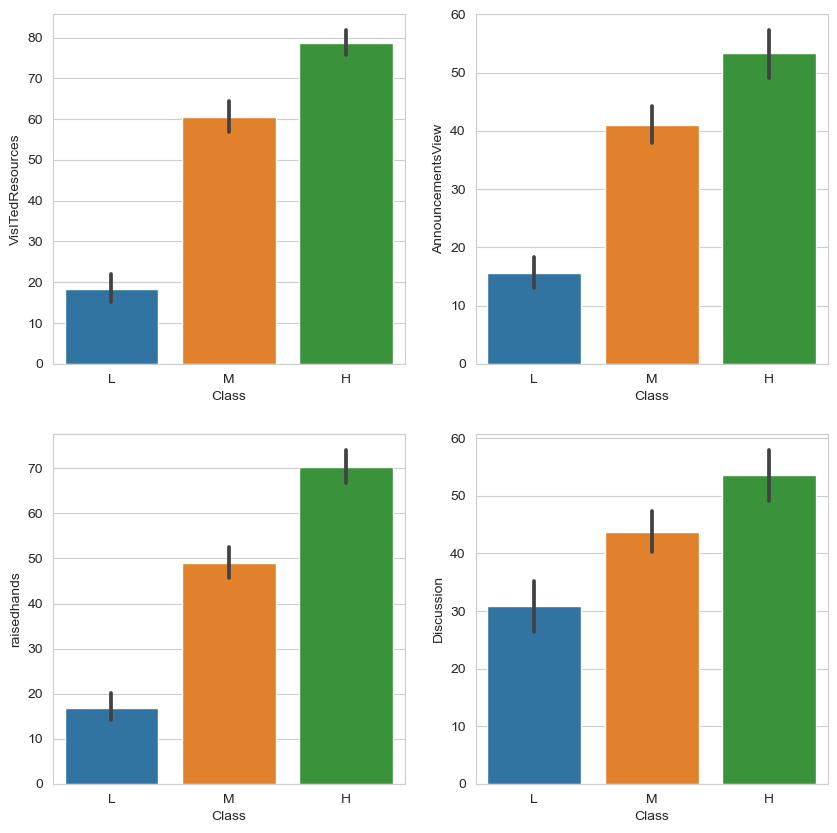

In [38]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sb.barplot(x='Class', y='VisITedResources', data=myData, order=['L','M','H'], ax=axarr[0,0])
sb.barplot(x='Class', y='AnnouncementsView', data=myData, order=['L','M','H'], ax=axarr[0,1])
sb.barplot(x='Class', y='raisedhands', data=myData, order=['L','M','H'], ax=axarr[1,0])
sb.barplot(x='Class', y='Discussion', data=myData, order=['L','M','H'], ax=axarr[1,1])

<Axes: xlabel='gender', ylabel='Discussion'>

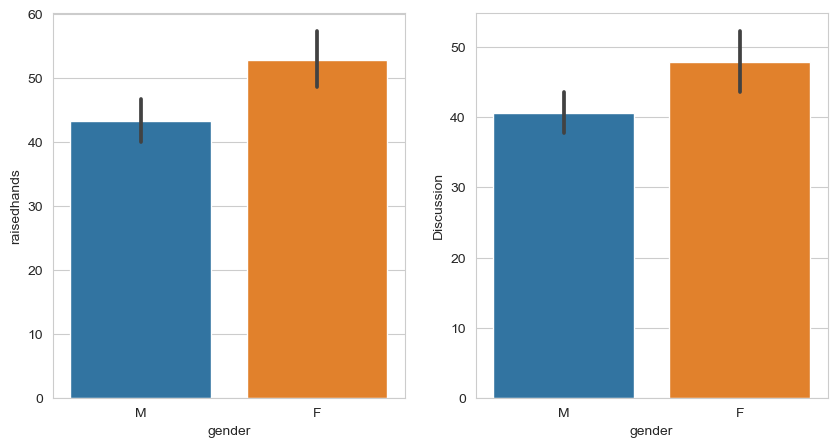

In [39]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sb.barplot(x='gender', y='raisedhands', data=myData, ax=axis1)
sb.barplot(x='gender', y='Discussion', data=myData, ax=axis2)

<Axes: xlabel='gender', ylabel='raisedhands'>

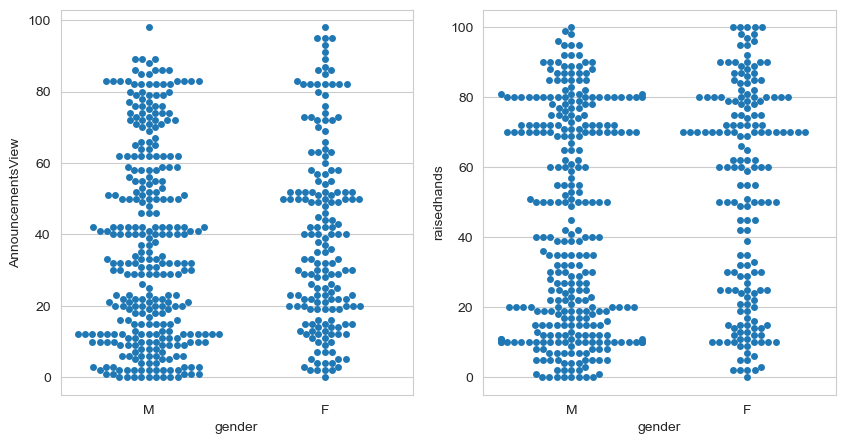

In [40]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sb.swarmplot(x='gender', y='AnnouncementsView', data=myData, ax=axis1)
sb.swarmplot(x='gender', y='raisedhands', data=myData, ax=axis2)

<Axes: xlabel='Class', ylabel='VisITedResources'>

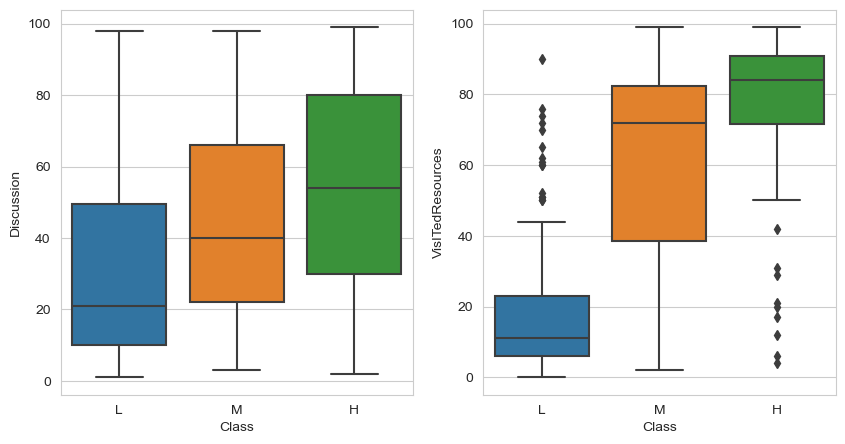

In [41]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sb.boxplot(x='Class', y='Discussion', data=myData, order=['L','M','H'], ax=axis1)
sb.boxplot(x='Class', y='VisITedResources', data=myData, order=['L','M','H'], ax=axis2)

<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

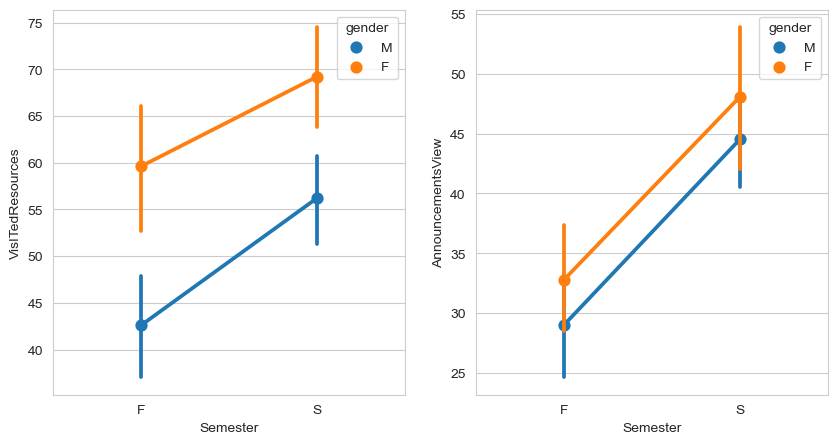

In [42]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sb.pointplot(x='Semester', y='VisITedResources', hue='gender', data=myData, ax=axis1)
sb.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=myData, ax=axis2)

<Axes: xlabel='AnnouncementsView', ylabel='Discussion'>

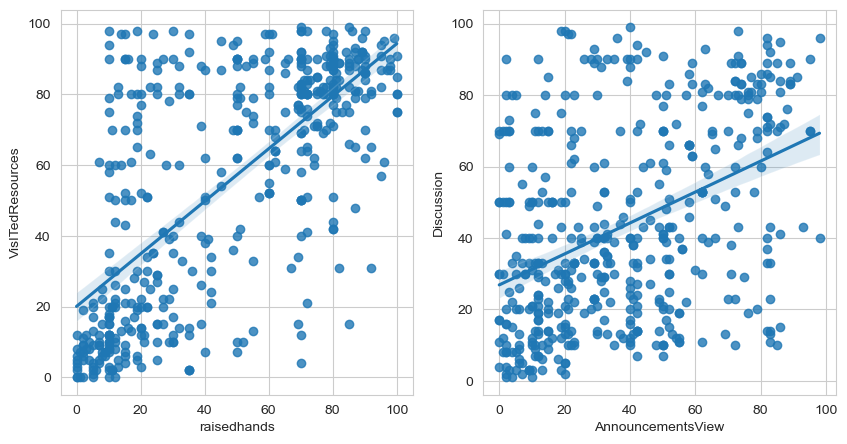

In [43]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sb.regplot(x='raisedhands', y='VisITedResources', data=myData, ax=axis1)
sb.regplot(x='AnnouncementsView', y='Discussion', data=myData, ax=axis2)

## Gender Comparison With Parents Relationship

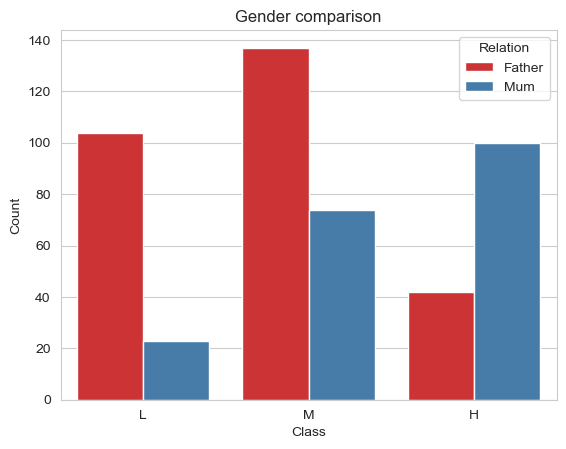

In [44]:
plot = sb.countplot(x='Class', hue='Relation', data=myData, order=['L', 'M', 'H'], palette='Set1')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

## Pairplot

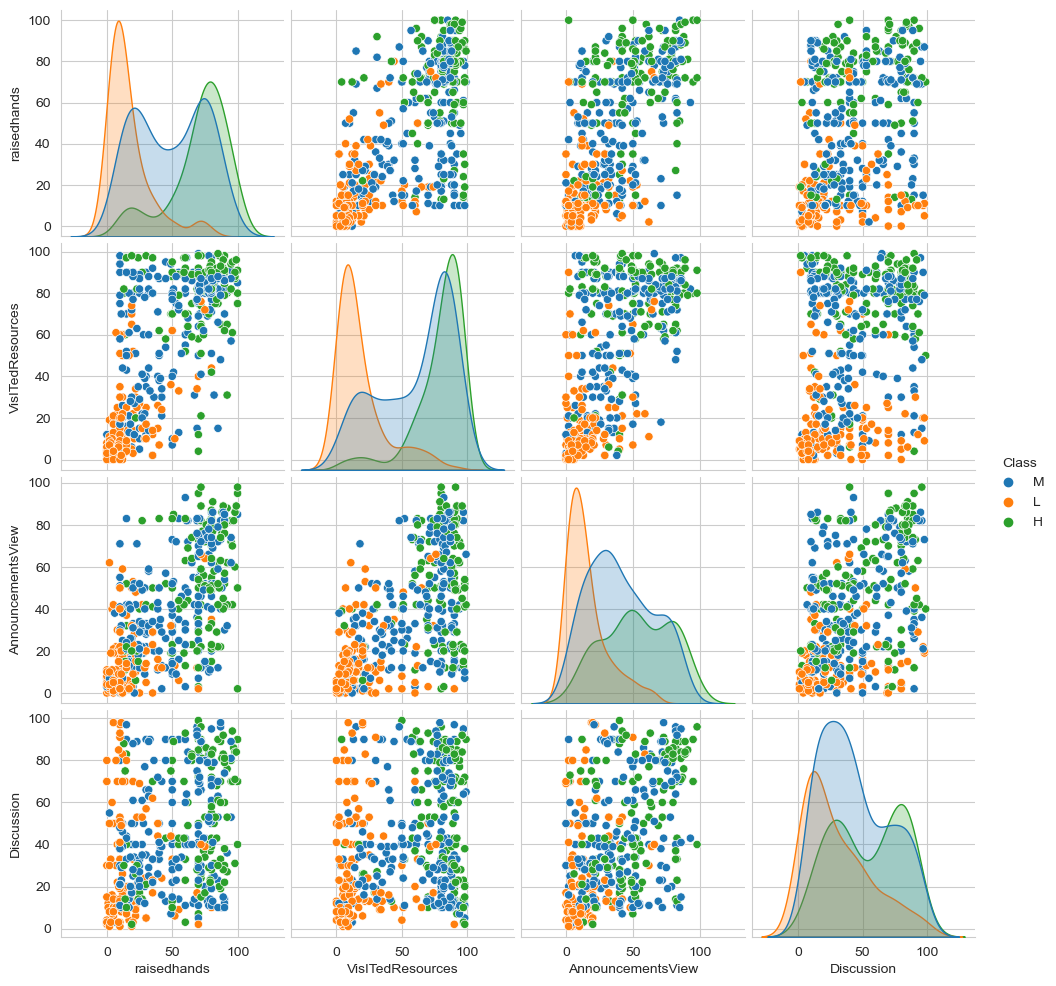

In [45]:
sb.pairplot(myData,hue='Class')

# Gender vs Place of Birth analysis

C:\Users\dell\AppData\Local\Temp\ipykernel_6036\475694983.py:6: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




Graph with 16 nodes and 26 edges


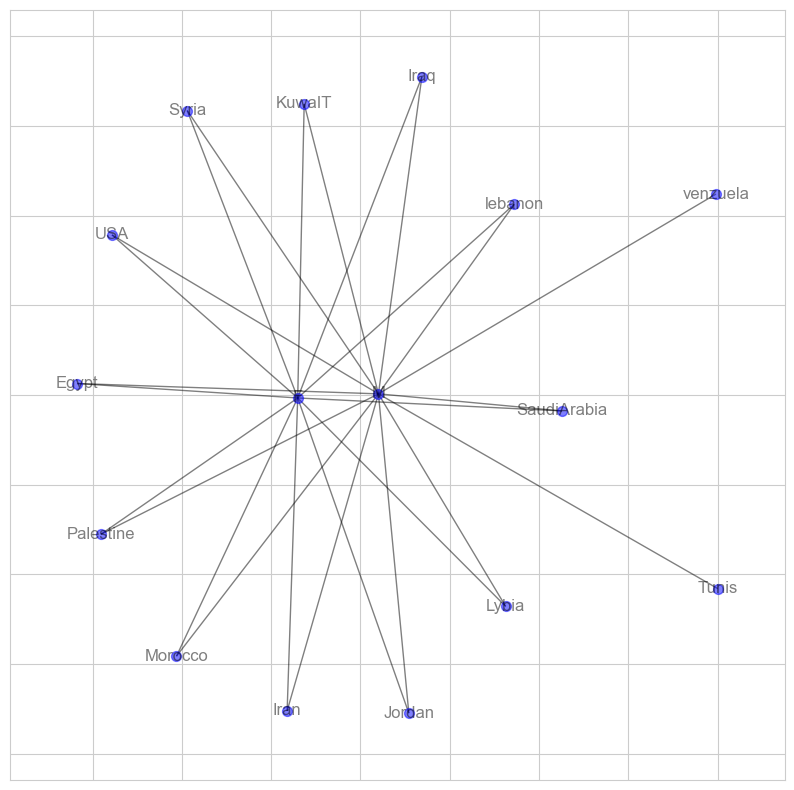

In [46]:
import networkx as nx

g= nx.Graph()
# g = nx.from_pandas_dataframe(myData,source='gender',target='PlaceofBirth')
g = nx.from_pandas_edgelist(myData,source='gender',target='PlaceofBirth')
print (nx.info(g))


plt.figure(figsize=(10,10)) 
nx.draw_networkx(g,with_labels=True,node_size=50, alpha=0.5, node_color="blue")
plt.show()

# Encoding 

<p><b>1.Gender Encoding

In [47]:
Features = myData.drop('gender',axis=1)
Target = myData['gender']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])
    

<p><b>2.Semester Encoding

In [48]:
Features = myData.drop('Semester',axis=1)
Target = myData['Semester']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>3.ParentAnsweringSurvey Encoding

In [49]:
Features = myData.drop('ParentAnsweringSurvey',axis=1)
Target = myData['ParentAnsweringSurvey']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>4.Relation Encoding 

In [50]:
Features = myData.drop('Relation',axis=1)
Target = myData['Relation']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>5.ParentschoolSatisfaction Encoding

In [51]:
Features = myData.drop('ParentschoolSatisfaction',axis=1)
Target = myData['ParentschoolSatisfaction']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>6.StudentAbsenceDays Encoding

In [52]:
Features = myData.drop('StudentAbsenceDays',axis=1)
Target = myData['StudentAbsenceDays']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>7.Class Encoding

In [53]:
Features = myData.drop('Class',axis=1)
Target = myData['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

## Spliting the Data Set for training and test

In [54]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

## Logistic Regression Model

In [55]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

c:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

<p><b>Logistic Regression's Prediction,Score & Report

In [56]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [57]:
print(Prediction)

['M' 'L' 'H' 'M' 'H' 'L' 'L' 'L' 'M' 'M' 'H' 'H' 'H' 'L' 'H' 'M' 'L' 'H'
 'L' 'M' 'H' 'H' 'L' 'M' 'L' 'L' 'H' 'H' 'L' 'L' 'H' 'M' 'L' 'H' 'M' 'M'
 'L' 'L' 'M' 'H' 'H' 'M' 'L' 'M' 'H' 'L' 'M' 'M' 'M' 'M' 'H' 'M' 'L' 'H'
 'M' 'M' 'L' 'H' 'M' 'L' 'M' 'L' 'L' 'H' 'M' 'M' 'L' 'H' 'L' 'M' 'L' 'H'
 'M' 'M' 'M' 'L' 'M' 'L' 'L' 'H' 'H' 'M' 'M' 'H' 'H' 'M' 'H' 'L' 'L' 'M'
 'H' 'M' 'M' 'M' 'L' 'M']


In [58]:
print(Score)

0.6979166666666666


In [59]:
print(Report)

              precision    recall  f1-score   support

           H       0.50      0.64      0.56        22
           L       0.81      0.96      0.88        26
           M       0.76      0.58      0.66        48

    accuracy                           0.70        96
   macro avg       0.69      0.73      0.70        96
weighted avg       0.71      0.70      0.70        96



## XGBoost 

In [60]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the XGBoost classifier
xgb_model = xgb.XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, seed=10)
xgb_pred = xgb_model.fit(X_train, y_train_encoded).predict(X_test)


In [61]:
print (classification_report(y_test_encoded,xgb_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.80      0.92      0.86        26
           2       0.86      0.77      0.81        48

    accuracy                           0.82        96
   macro avg       0.81      0.84      0.82        96
weighted avg       0.83      0.82      0.82        96



In [64]:

print(accuracy_score(y_test_encoded,xgb_pred))

0.8229166666666666


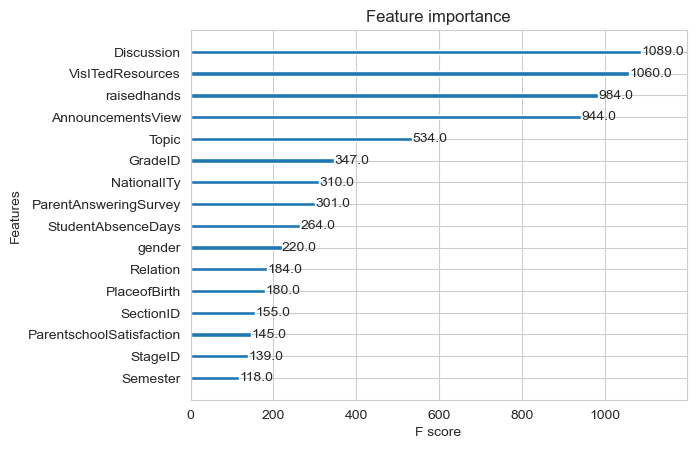

In [65]:
xgb.plot_importance(xgb_model)
plt.show()